In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

In [2]:
# read cost - epoch
epoch_cost=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/all_geneepoch160check_nNoneLr0.001C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0nD30autoDTrueautoNTrueavgCTrueavgCWin10p10/brief_e160.csv',index_col=0).reset_index(drop=True)


0.040808455464316336

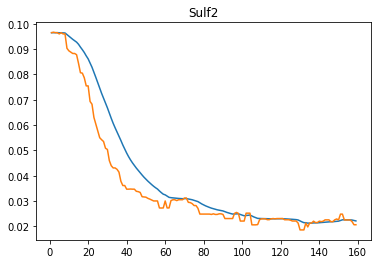

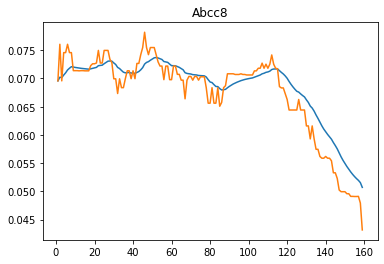

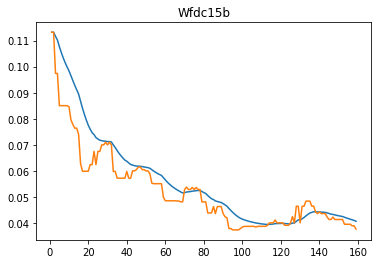

In [5]:
###### smooth

def smooth(scalars, weight: float):# -> List[float]:  # Weight between 0 and 1
    # https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

# x_labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# train_data=[100,300,200]*5
# plt.plot(x_labels, smooth(train_data, .9), x_labels, train_data)


gene_list=['Sulf2','Abcc8','Wfdc15b']
for gene_name in gene_list:
    onegene=epoch_cost[epoch_cost.gene_name==gene_name].reset_index(drop=True)
    plt.figure()
    plt.title(gene_name)
    plt.plot(onegene.epoch, smooth(onegene.cost, .9), onegene.epoch, onegene.cost)
####
smooth(onegene.cost, .9)[-1]

In [14]:
train_data

[100, 300, 200, 100, 300, 200, 100, 300, 200, 100, 300, 200, 100, 300, 200]

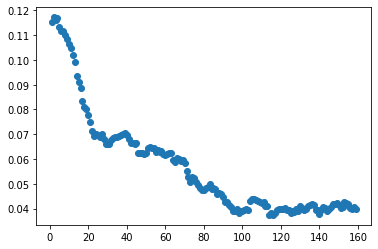

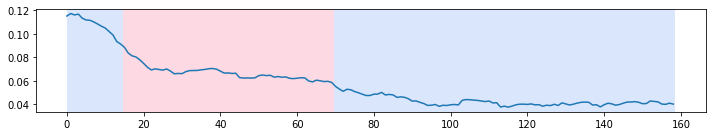

[15, 70, 159]


In [4]:
# generate signal
# n_samples, dim, sigma = 159, 1, 4
# n_bkps = 2  # number of breakpoints
# signal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)
epoch_cost
# onegene=epoch_cost[epoch_cost.gene_name=='Abcc8']
# onegene=epoch_cost[epoch_cost.gene_name=='Sulf2']
onegene=epoch_cost[epoch_cost.gene_name=='Wfdc15b']
onegene
plt.scatter(onegene.epoch,onegene.cost)

signal=onegene[['cost','epoch']].to_numpy()
# detection

# algo = rpt.BottomUp(model="rbf").fit(signal)
# result = algo.predict(pen=10)

algo = rpt.Window(model="rbf",width=10).fit(signal)
result = algo.predict(pen=10)

# display
rpt.display(signal, result)
plt.show()

print(result)



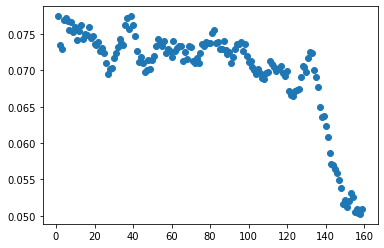

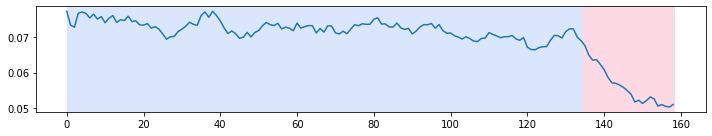

[135, 159]


In [7]:
onegene=epoch_cost[epoch_cost.gene_name=='Abcc8']
# onegene=epoch_cost[epoch_cost.gene_name=='Sulf2']
# onegene=epoch_cost[epoch_cost.gene_name=='Wfdc15b']
onegene
plt.scatter(onegene.epoch,onegene.cost)
signal=onegene.cost.to_numpy()
# detection
# algo = rpt.Dynp(model="rbf").fit(signal)
# result = algo.predict(pen=10)

algo = rpt.Window(model="rbf",width=10).fit(signal)
result = algo.predict(pen=10)

# display
rpt.display(signal, result)
plt.show()

print(result)

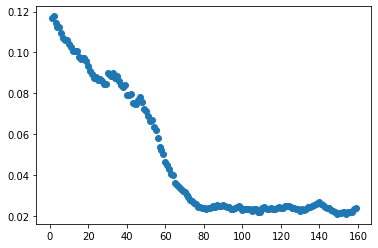

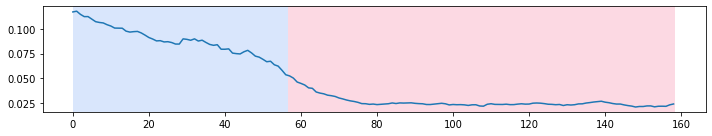

[57, 159]


In [125]:
# onegene=epoch_cost[epoch_cost.gene_name=='Abcc8']
onegene=epoch_cost[epoch_cost.gene_name=='Sulf2']
# onegene=epoch_cost[epoch_cost.gene_name=='Wfdc15b']
onegene
plt.scatter(onegene.epoch,onegene.cost)
signal=onegene.cost.to_numpy()
# detection

# algo = rpt.KernelCPD().fit(signal)
# result = algo.fit_predict(signal=(160,))
# print(result)

# algo = rpt.BottomUp(model="rbf").fit(signal)
# result = algo.predict(pen=10)

algo = rpt.Window(model="rbf",width=50,min_size=2,jump=3).fit(signal)
result = algo.predict(pen=20)

# display
rpt.display(signal, result)
plt.show()

print(result)


In [9]:
from luminaire.exploration.data_exploration import DataExploration

In [19]:
de_obj = DataExploration(freq='D')
df_signal = pd.DataFrame(signal)
df_signal.columns=['raw']
print(df_signal)
imputed_data, pre_prc = de_obj.profile(df_signal, impute_only=True)
print(imputed_data)

          raw
0    0.116945
1    0.117702
2    0.114517
3    0.112233
4    0.112263
..        ...
154  0.021896
155  0.021942
156  0.021841
157  0.023340
158  0.024207

[159 rows x 1 columns]
None


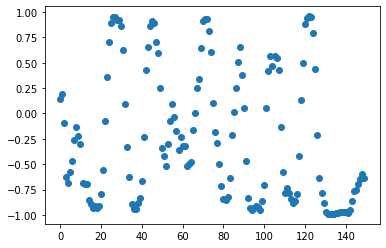

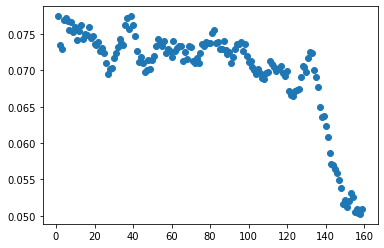

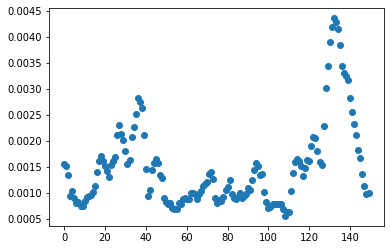

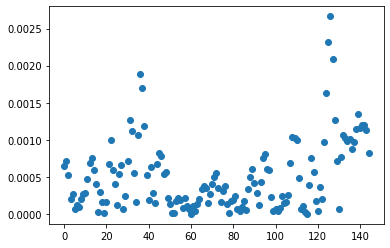

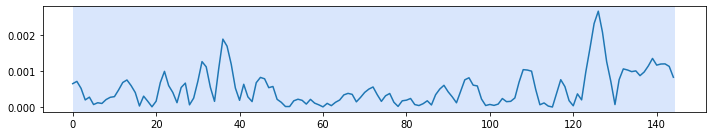

[145]


In [199]:
from numpy import cov
from scipy.stats import pearsonr
import statistics

onegene=epoch_cost[epoch_cost.gene_name=='Abcc8']
# onegene=epoch_cost[epoch_cost.gene_name=='Sulf2']
# onegene=epoch_cost[epoch_cost.gene_name=='Wfdc15b']
# print(onegene)

window = 10
gap = 5

corr = []
sd = []

for i in range(160-window):
    corr_tmp, _ = pearsonr(onegene[i:(i+window)].epoch, onegene[i:(i+window)].cost)
    corr.append(corr_tmp)
    sd_tmp=statistics.stdev(onegene[i:(i+window)].cost)
    sd.append(sd_tmp)
    # print(sd_tmp)

sd2 = np.subtract(sd[gap:len(sd)],sd[0:len(sd)-gap])
    
plt.scatter(range(len(corr)),corr)
plt.show()
plt.scatter(onegene.epoch,onegene.cost)
plt.show()
plt.scatter(range(len(sd)),sd)
plt.show()
plt.scatter(range(len(sd2)),abs(sd2))
plt.show()



signal=onegene.cost.to_numpy()
# detection
# algo = rpt.Dynp(model="rbf").fit(signal)
# result = algo.predict(pen=10)

algo = rpt.Window(model="rbf",width=window).fit(np.array(abs(sd2)))
result = algo.predict(pen=10)

# display
rpt.display(np.array(abs(sd2)), result)
plt.show()

print(result)

In [170]:
sd

NameError: name 'sd' is not defined

In [34]:
datetime.timedelta(days=1)

AttributeError: type object 'datetime.datetime' has no attribute 'timedelta'

In [39]:
import datetime

datetime.timedelta(days=1)

datetime.timedelta(days=1)

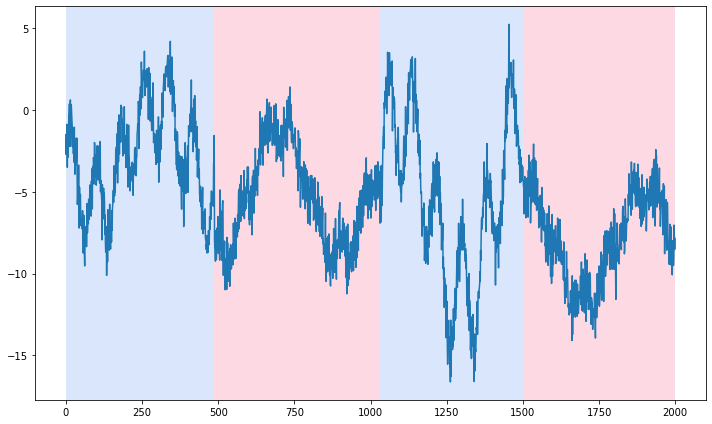

In [96]:
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt

# creation of data
n, n_reg = 2000, 3  # number of samples, number of regressors (including intercept)
n_bkps = 3  # number of change points
# regressors
tt = np.linspace(0, 10 * np.pi, n)
X = np.vstack((np.sin(tt), np.sin(5 * tt), np.ones(n))).T
# parameter vectors
deltas, bkps = rpt.pw_constant(n, n_reg, n_bkps, noise_std=None, delta=(1, 3))
# observed signal
y = np.sum(X * deltas, axis=1)
y += np.random.normal(size=y.shape)
# display signal
rpt.show.display(y, bkps, figsize=(10, 6))
plt.show()

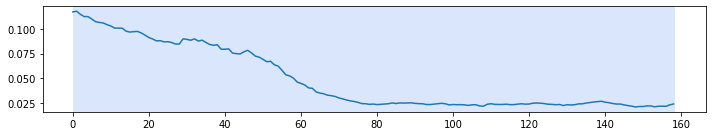

[159]


In [140]:
signal=onegene[['cost']].to_numpy()

# signal
# algo
# result = algo.predict(n_bkps=20)

algo = rpt.Window(model="linear",width=50,min_size=50,jump=10).fit(signal)
result = algo.predict(pen=20)
rpt.display(signal, result)
plt.show()

print(result)

In [98]:
# stack observed signal and regressors.
# first dimension is the observed signal.
signal = np.column_stack((y.reshape(-1, 1), X))
c = rpt.costs.CostLinear().fit(signal)
print(c.error(50, 150))

88.37328935146772


In [106]:
X.shape

(2000, 3)

In [91]:
print(c.sum_of_costs(bkps))
print(c.sum_of_costs([10, 100, 200, 250, n]))

1901.4574519688585
10173.62573887685


In [92]:
c = rpt.costs.CostLinear()
algo = rpt.Window(custom_cost=c,width=50)
# is equivalent to
algo = rpt.Window(model="linear")

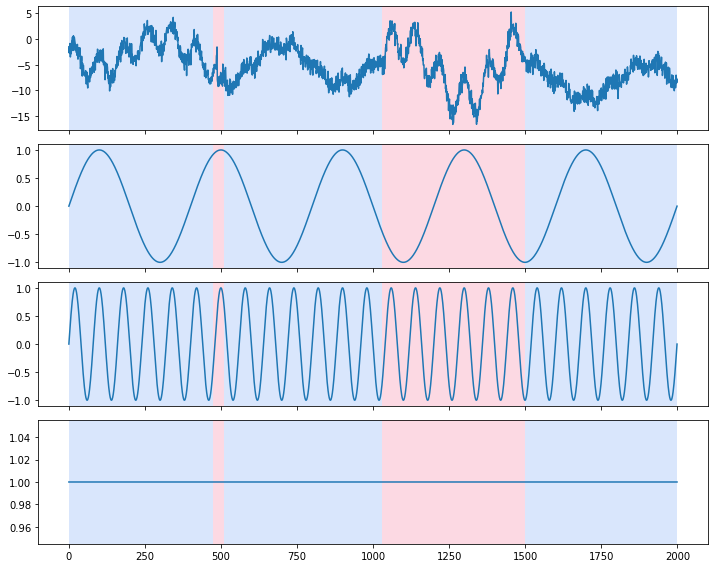

[474, 510, 1029, 1500, 2000]


In [99]:
# signal
# algo
# result = algo.predict(n_bkps=20)

algo = rpt.Window(model="linear",width=50,min_size=2,jump=3).fit(signal)
result = algo.predict(pen=20)
rpt.display(signal, result)
plt.show()

print(result)

In [ ]:
c = rpt.costs.CostLinear()
algo = rpt.Dynp(custom_cost=c)
# is equivalent to
algo = rpt.Dynp(model="linear")


